<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [56]:
import pandas as pd

import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [57]:
data = pd.read_csv('/datasets/insurance.csv')
data.head(5)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


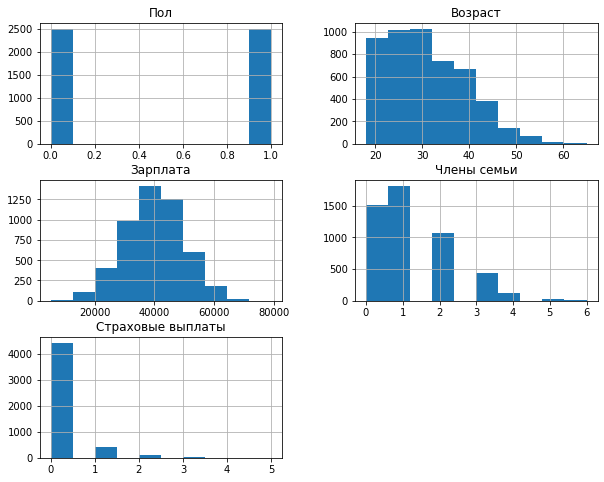

In [59]:
data.hist(figsize=(10, 8));

In [60]:
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [61]:
data['Возраст'].unique()

array([41., 46., 29., 21., 28., 43., 39., 25., 36., 32., 38., 23., 40.,
       34., 26., 42., 27., 33., 47., 30., 19., 31., 22., 20., 24., 18.,
       37., 48., 45., 44., 52., 49., 35., 56., 65., 55., 57., 54., 50.,
       53., 51., 58., 59., 60., 61., 62.])

In [62]:
data['Зарплата'].unique()

array([49600., 38000., 21000., 41700., 26100., 41000., 39700., 38600.,
       49700., 51700., 36600., 29300., 39500., 55000., 43700., 23300.,
       48900., 33200., 36900., 43500., 36100., 26600., 48700., 40400.,
       38400., 34600., 34800., 36800., 42200., 46300., 30300., 51000.,
       28100., 64800., 30400., 45300., 38300., 49500., 19400., 40200.,
       31700., 69200., 33100., 31600., 34500., 38700., 39600., 42400.,
       34900., 30500., 24200., 49900., 14300., 47000., 44800., 43800.,
       42700., 35400., 57200., 29600., 37400., 48100., 33700., 61800.,
       39400., 15600., 52600., 37600., 52500., 32700., 51600., 60900.,
       41800., 47400., 26500., 45900., 35700., 34300., 26700., 25700.,
       33300., 31100., 31500., 42100., 37300., 42500., 27300., 46800.,
       33500., 44300., 41600., 53900., 40100., 44600., 45000., 32000.,
       38200., 33000., 38500., 51800., 33800., 46400., 43200., 31800.,
       50200., 35100., 30700., 45800., 49300., 42800., 33600., 50300.,
      

In [63]:
data['Возраст'] = data['Возраст'].astype('int')

In [64]:
data['Зарплата'] = data['Зарплата'].astype('int')

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Пол                5000 non-null   int64
 1   Возраст            5000 non-null   int64
 2   Зарплата           5000 non-null   int64
 3   Члены семьи        5000 non-null   int64
 4   Страховые выплаты  5000 non-null   int64
dtypes: int64(5)
memory usage: 195.4 KB


В данных не было обнаружено аномалий. Решил поменять значения столбцов на целочисленные для ускорения работы, а сделал я это потому что в данных нет дробных значений.

Создаем обратимую матрицу

In [66]:
invert = np.random.rand(4, 4)
np.linalg.inv(invert)

array([[-1.23739864,  0.27826737,  0.13904347,  0.94207878],
       [ 0.7318193 ,  3.85379302, -0.44221667, -1.83820173],
       [ 1.86098469,  1.95182334, -1.88513437,  0.27103475],
       [-1.10753573, -6.08945435,  2.97360952,  0.89554918]])

In [67]:
features = data.drop('Страховые выплаты', axis=1)
target = data['Страховые выплаты']
print(features.shape)
print(target.shape)

(5000, 4)
(5000,)


In [68]:
def predictions(features, target):
    model = LinearRegression()
    model.fit(features, target)
    score = model.score(features, target)
    return score

R2 для обычной матрицы

In [69]:
predictions(features, target)

0.42494550308169177

R2 для матрицы умноженной на обратимую

In [70]:
x = features @ invert
predictions(x, target)

0.42494550308169365

*Вывод: качество линейной регрессии при умножении на обратимую матрицу не меняется.*

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** 
R2 не поменяется



**Обоснование:** 

Задача обучения заключается в минимизации MSE между вектором предсказаний и целевым вектором:

$
w = \arg\min_w MSE(Xw, y) 
$

Новая матрица равна:

$
A = XP
$

Соответсвенно новая задача обучения выглядит так:

$
w_p = \arg\min_w MSE(XPw_p, y) 
$

Первый аргумент можно преобразовать вот так:

$
XPw_p = XP ((XP)^T XP)^{-1} (XP)^T y = XP(P^T X^T X P)^{-1} (XP)^T y
$

Матрица $Х^T$ имеет размерность 4 на 5000, а матрица $Х$ - 5000 на 4, следовательно их произведение даст квадратную матрицу с размерностью 5000 на 5000. В итоге в скобке получается 3 квадртаные матрицы и их можно раскрыть по свойству.

$
XPw_p = XP P^{-1} (X^TX)^{-1} (P^T)^{-1} P^T X^T y = XP P^{-1} (X^TX)^{-1} X^T y = X(X^TX)^{-1} X^T y
$

В итоге:
$
XPw_p = X(X^TX)^{-1} X^T y, и XPw = X(X^TX)^{-1} X^T y, следовательно XPw_p = XPw
$


## Алгоритм преобразования

**Алгоритм**

Для защиты информации предлагаю умножить исходную матрицу признаков на обратимую матрицу.

Этапы:

1) Создание функции для генерации обратимой матрицы, размером с количество признаков.

2) Проверка матрицы на обратимость

3) Создание новой матрицы признаков путем умножения исходной матрицы на обратимую новую


**Обоснование**

Поскольку метрика R2 не изменилась на преобразованных данных - мы можем применить такой метод дальше.

## Проверка алгоритма

In [71]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=12345)

In [72]:
model = LinearRegression()
model.fit(features_train, target_train)
pred = model.predict(features_test)
print('R2 на исходной выборке:', r2_score(target_test, pred))

R2 на исходной выборке: 0.4352275684083322


Создаем обратимую матрицу.

In [73]:
def func(dim):
    transform_matrix = np.random.rand(dim, dim)
    try: 
        inv = np.linalg.inv(transform_matrix)
        return transform_matrix, inv
    except:
        func(dim)
inv

array([[5.78275993e-01, 4.41324504e-01, 2.03882251e-01, 1.00348478e-01],
       [4.68854154e-01, 4.15790672e-01, 2.62313401e-02, 2.78110569e-01],
       [9.72647884e-01, 7.91547618e-01, 1.39098447e-01, 1.17156361e-01],
       [1.95686532e-04, 5.92313412e-02, 2.93137718e-02, 9.02893025e-01]])

Создаем зашифрованные признаки.

In [74]:
new_features = features @ inv

In [75]:
new_features.head(5)

,0,1,2,3
0,48263.136529,39278.309807,6900.591670,5823.361282
1,36982.187071,30097.995071,5286.976955,4465.637698
2,20439.202330,16634.557899,2921.828103,2468.348788
3,40569.263083,33016.385721,5801.014740,4893.066363
4,25399.815960,20671.476283,3631.407836,3065.668467


In [76]:
features_train, features_test, target_train, target_test = train_test_split(new_features, target, test_size=0.25, random_state=12345)

In [77]:
model = LinearRegression()
model.fit(features_train, target_train)
pred = model.predict(features_test)
print('R2 на преобразованной выборке:', r2_score(target_test, pred))

R2 на преобразованной выборке: 0.4352275683833773


В ходе работы было проделано:

1)Загружены и изучены данные.

2)Качество линейной регресии не изменилось от использования исодной матрици и исходной матрицы, умноженную на обратимую.

3)Создан алгоритм преобразования данных.

4)Исследован алгоритм преобразования данных и проверена метрика R2 для данных без преобразования и с ним.

По результатам работы использования матричных операций можно увидеть, что данные очень просто зашифровать от распознования, имея правильную матрицу.